In [15]:
#Importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**READING THE DATASET**

In [16]:
cols=['ID','Topic','Sentiment','Text']
train=pd.read_csv("twitter_training.csv",names=cols)
#here train is my dataframe and we used cols here so as to label the columns

In [17]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


**INFORMATION ABOUT THE DATAFRAME**

In [18]:
train.shape

(74682, 4)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [23]:
train.describe(include='object')

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69489
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [24]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [25]:
#checking for null/missing values in the dataset
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,686


In [27]:
#drop the null values
train.dropna(inplace=True)
##when you set inplace=True, the method will modify the original DataFrame (train in this case) directly, and no new DataFrame will be created.

In [28]:
#checking again for null values
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,0


*NO NULL VALUES PRESENT NOW*

In [29]:
#CHECKING FOR DUPLICATES VALUES
train.duplicated().sum()

2341

In [30]:
#removing the duplicates values
train.drop_duplicates(inplace=True)

In [31]:
#CHECKING AGAIN FOR DUPLICATED VALUES
train.duplicated().sum()

0

**VISUALIZATION OF COUNT OF DIFFERENT TOPICS**

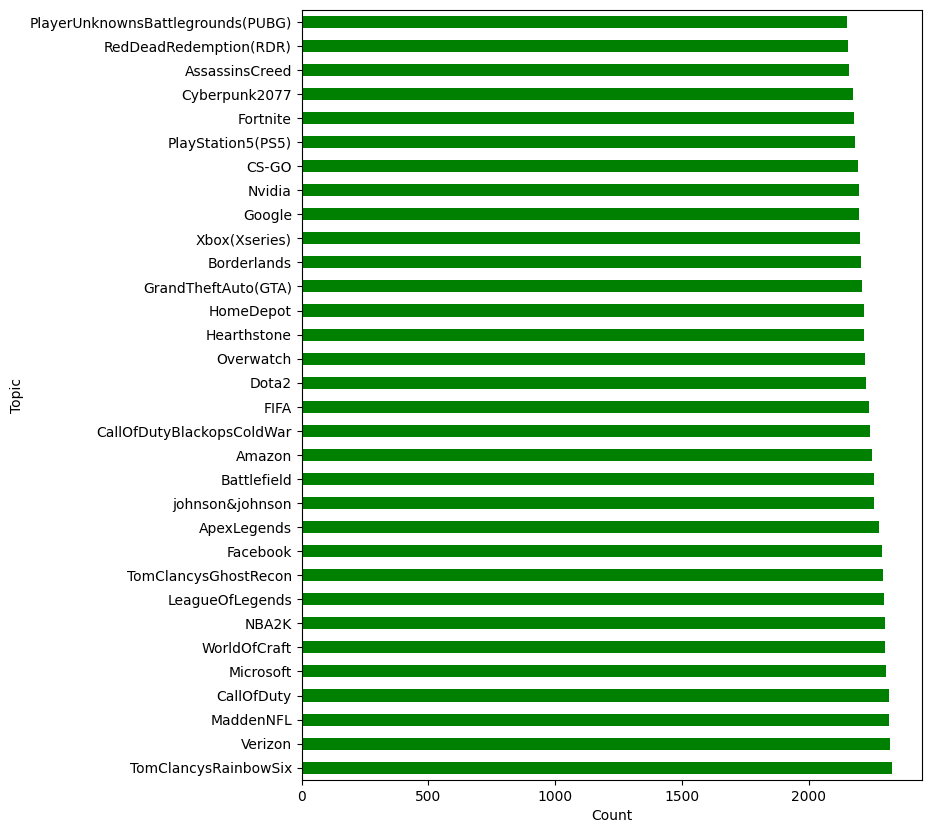

In [32]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel('Count')
plt.show()

**Sentiment distribution**

<ipython-input-33-682b04585268>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Sentiment', data= train, palette='viridis')


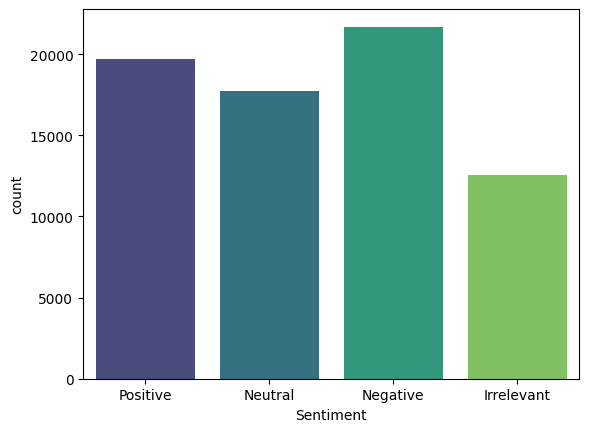

In [33]:
sns.countplot(x= 'Sentiment', data= train, palette='viridis')
plt.show()

In [35]:
#calculation the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

#print the counts
print(sentiment_counts)

Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64


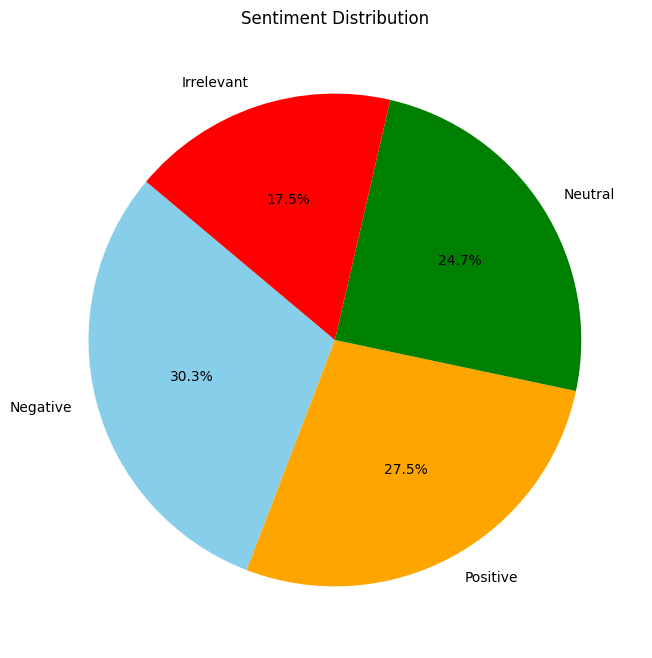

In [36]:
#creating a pie chart
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','orange','green','red','purple'])
plt.title('Sentiment Distribution')
plt.show()

**MOST TOPIC HAS NEGATIVE SENTIMENT**

In [37]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


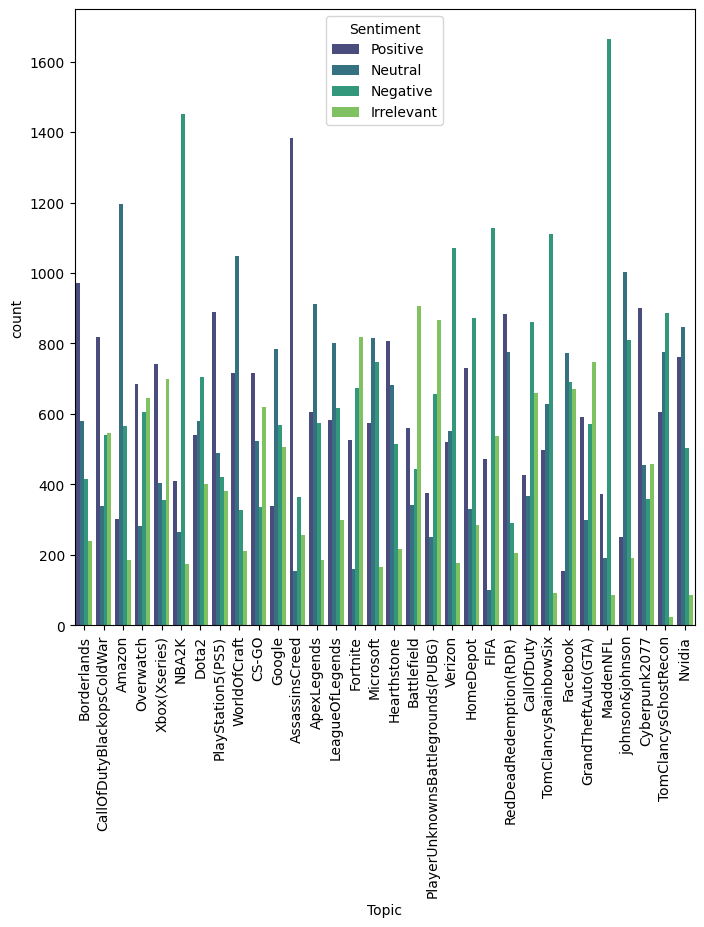

In [39]:
#sentiment distribution topic wise
plt.figure(figsize=(8,8))
sns.countplot(x='Topic',hue='Sentiment',data=train,palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [40]:
#GROUP BY TOPIC AND SENTIMENT
topic_wise_sentiment = train.groupby(['Topic', 'Sentiment']).size().reset_index(name='Count')

In [42]:
#select top 5 topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiments= topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]
#It selects the top 5 topics with the highest counts. The result is still a Series, but now only containing the counts for the top 5 topics.

**TOP 5 TOPICS WITH NEGATIVE SENTIMENTS**

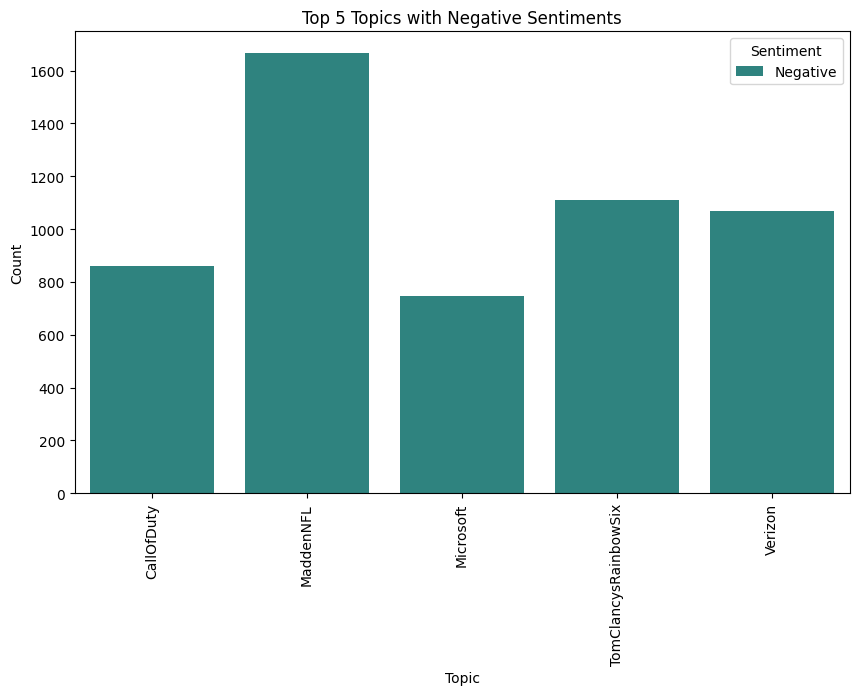

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_topics_sentiments[top_topics_sentiments['Sentiment']=='Negative'],x='Topic', y='Count', hue='Sentiment', palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xticks(rotation=90)
plt.show()

data=top_topics_sentiments[top_topics_sentiments['Sentiment']=='Negative']:

This specifies the data to be used for the bar plot. It filters the top_topics_sentiments DataFrame to include only the rows where the 'Sentiment' column is equal to 'Negative'.
The resulting DataFrame will contain only the counts of negative sentiments for the top topics, which is what we want to visualize.

*TOP 5 TOPICS WITH POSITIVE SENTIMENTS*

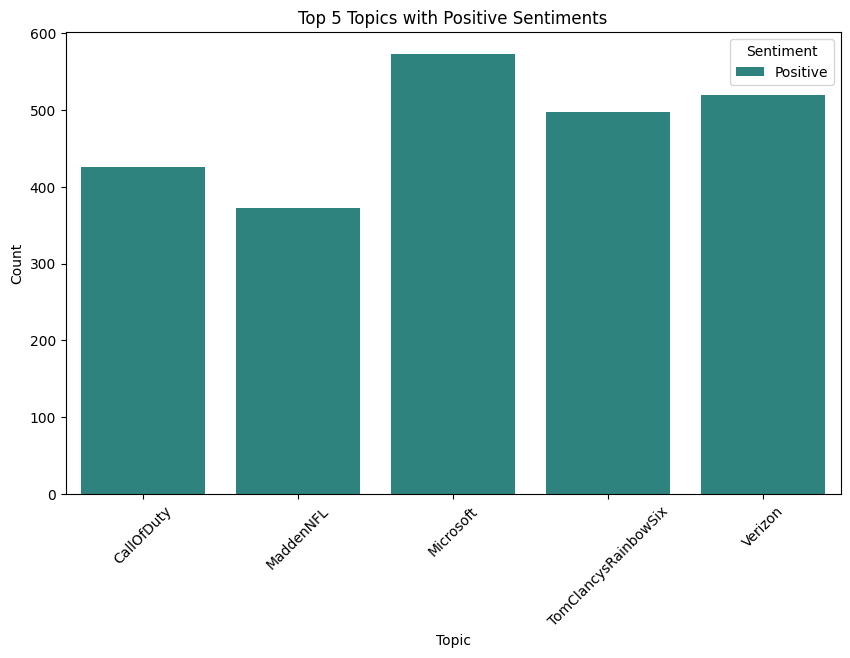

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_topics_sentiments[top_topics_sentiments['Sentiment']=='Positive'],x='Topic', y='Count', hue='Sentiment', palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xticks(rotation=45)
plt.show()

*TOP 5 TOPICS WITH NEUTRAL SENTIMENTS*

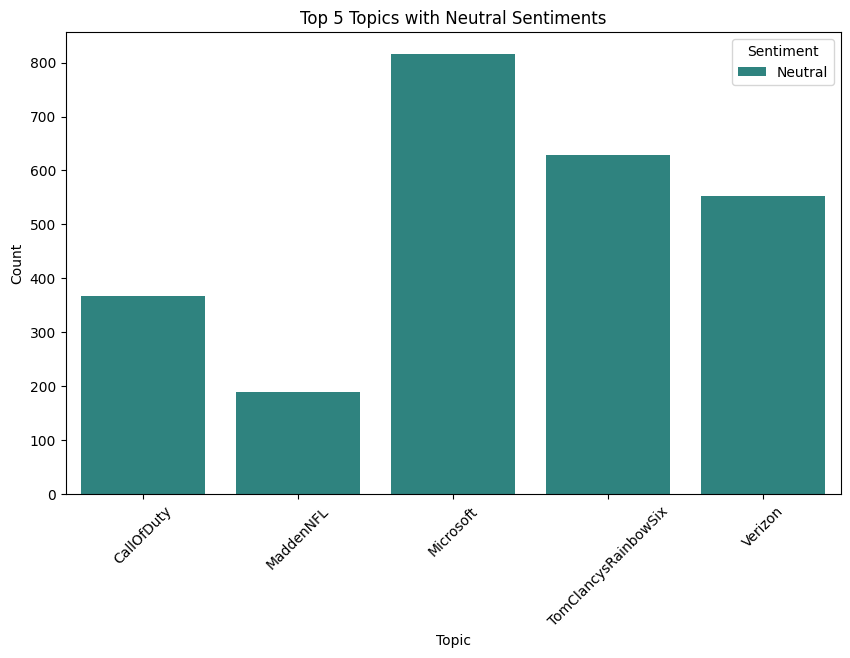

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_topics_sentiments[top_topics_sentiments['Sentiment']=='Neutral'],x='Topic', y='Count', hue='Sentiment', palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xticks(rotation=45)
plt.show()

*TOP 5 TOPICS WITH IRRELEVANT SENTIMENTS*

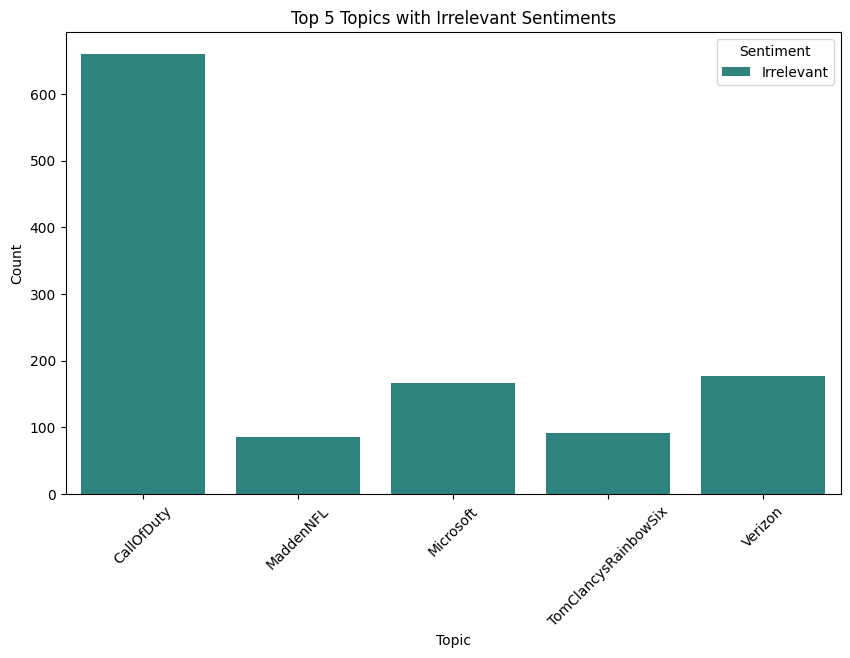

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_topics_sentiments[top_topics_sentiments['Sentiment']=='Irrelevant'],x='Topic', y='Count', hue='Sentiment', palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xticks(rotation=45)
plt.show()

**SENTIMENT DISTRIBUTION IN GOOGLE**

In [50]:
#filter the dataset to include only enteries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

#count the occurences of each sentiment within the filtered datasets
sentiment_counts = google_data['Sentiment'].value_counts()

#print the results
print(sentiment_counts)

Sentiment
Neutral       785
Negative      570
Irrelevant    505
Positive      339
Name: count, dtype: int64


This line filters the train DataFrame to include only those rows where the 'Topic' column is equal to 'Google'.
The result is a new DataFrame, google_data, that contains only the records related to the topic "Google".


Filtering: The first line filters the DataFrame to focus on a specific topic, "Google."
Counting Sentiments: The second line counts how many times each sentiment appears in the filtered dataset.
Output: The final line prints the counts of each sentiment for the topic "Google," allowing for easy analysis of how people feel about it.

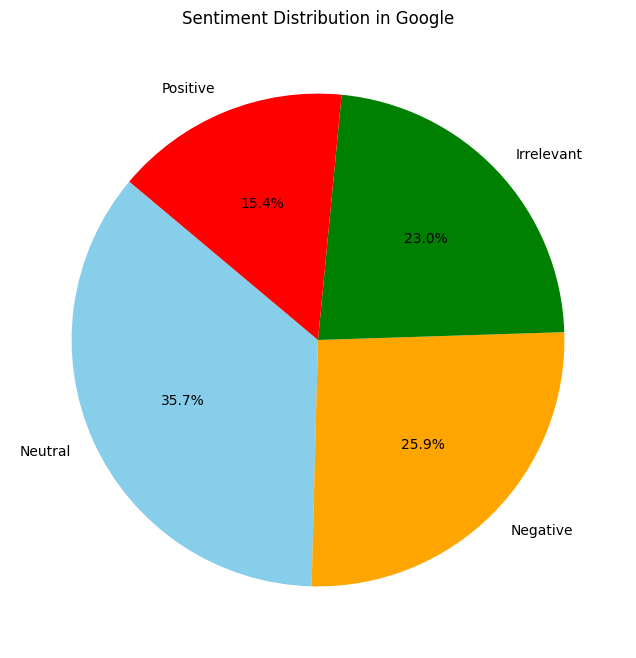

In [51]:
#plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','orange','green','red','purple'])
plt.title('Sentiment Distribution in Google')
plt.show()

*SENTIMENT DISTRIBUTION IN MICROSOFT*

In [52]:
#filter the dataset to include only enteries related to the topic 'Google'
ms_data = train[train['Topic'] == 'Microsoft']


#count the occurences of each sentiment within the filtered datasets
sentiment_counts = ms_data['Sentiment'].value_counts()

#print the results
print(sentiment_counts)

Sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64


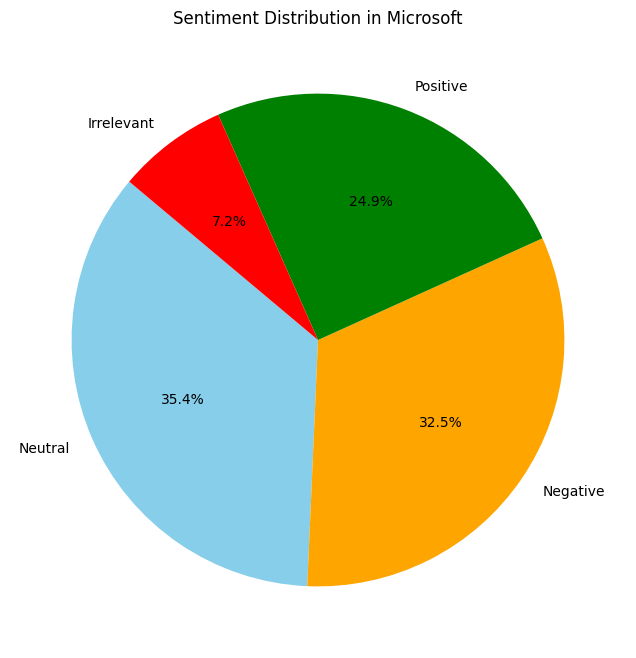

In [53]:
#plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','orange','green','red','purple'])
plt.title('Sentiment Distribution in Microsoft')
plt.show()

In [54]:
train['msg_len'] = train['Text'].apply(len)

train['Text']:

This accesses the 'Text' column of the train DataFrame, which presumably contains the messages or texts for each entry.
.apply(len):

The apply() method is a pandas function that allows  to apply a function to each element of a Series (in this case, each message in the 'Text' column).
Here, the built-in len function is passed to apply(), which computes the length of each string (message) in the 'Text' column. It counts the number of characters in each message.
train['msg_len'] = ...:

This part assigns the result of the apply(len) operation to a new column called 'msg_len' in the train DataFrame.
Each row in the 'msg_len' column will now contain the length of the corresponding message in the 'Text' column.


In [55]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


**PLOT OF MESSAGE LENGTH DISTRIBUTION FOR TRAINING DATA**

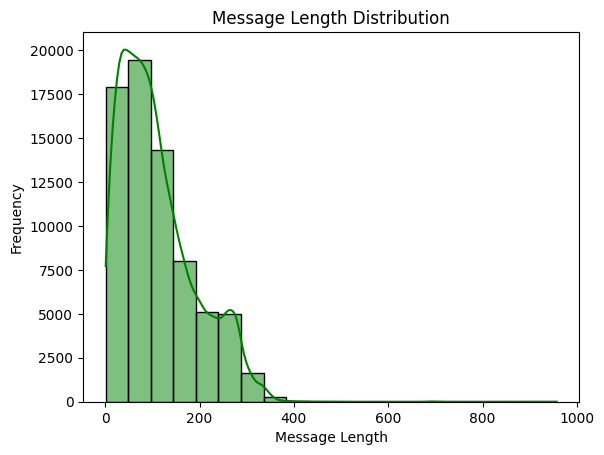

In [59]:
sns.histplot(train['msg_len'],kde=True,color='g',bins=20)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

Setting kde=True adds a Kernel Density Estimate to the histogram. The KDE is a smooth curve that represents the distribution of data. It provides a continuous probability density function that helps to visualize the underlying distribution of the data more clearly.


**PLOT MESSAGE LENGTH DISTRIBUTION BY SENTIMENT FOR TRAINING DATA**

<ipython-input-63-acd7f5b27651>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['Sentiment'], y='msg_len',palette='viridis',order=['Positive','Negative','Neutral','Irrelevant'])


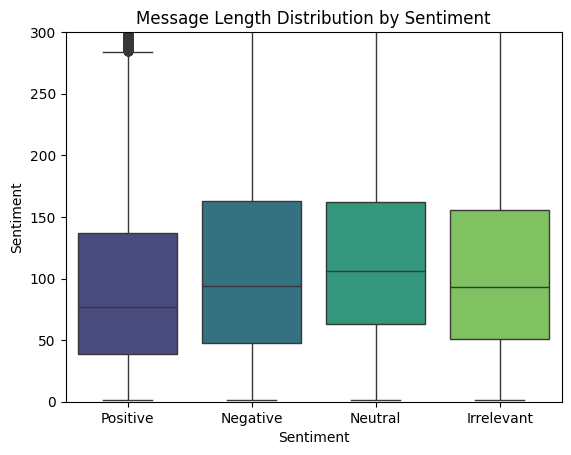

In [63]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len',palette='viridis',order=['Positive','Negative','Neutral','Irrelevant'])
plt.title('Message Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment')
plt.ylim(0,300)
plt.show()

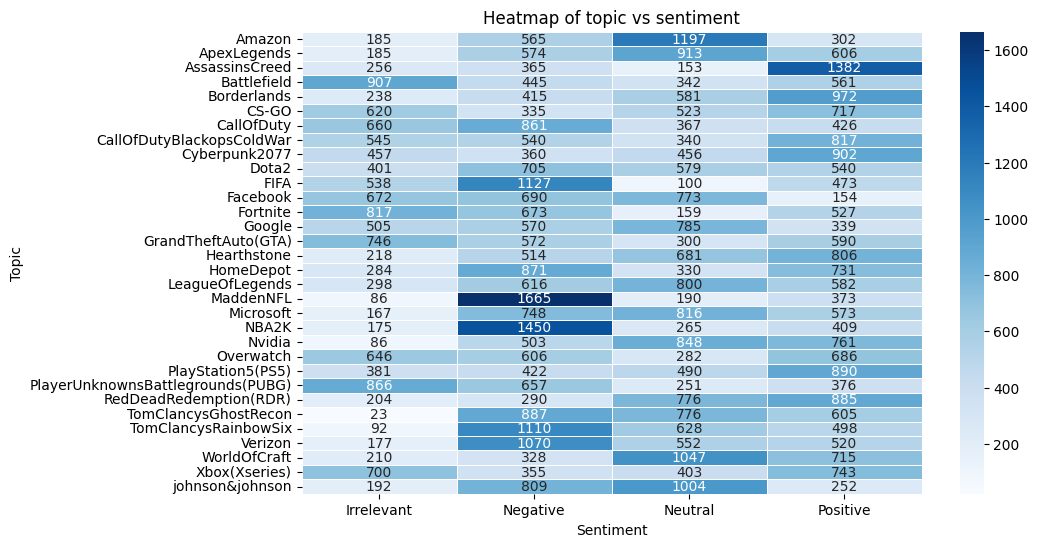

In [64]:
#creating the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

#plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', linewidth=.5)

#Adding the labels and title
plt.title('Heatmap of topic vs sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

This specifies that the rows of the cross-tabulation should correspond to unique values from the 'Topic' column of the train DataFrame.
columns=train['Sentiment']:

This specifies that the columns of the cross-tabulation should correspond to unique values from the 'Sentiment' column.
crosstab:

The result is a DataFrame where the rows represent different topics, the columns represent different sentiments, and the values in the table show the count of occurrences for each combination of topic and sentiment.

cmap='Blues':

This parameter sets the color map for the heatmap. The 'Blues' color map shades cells with varying shades of blue, with darker shades representing higher values.
annot=True:

Setting this to True adds the actual values (counts) from the cross-tabulation as annotations in the cells of the heatmap. This makes it easier to see the exact counts.
fmt='d':

This parameter specifies the format of the annotations in the cells. Here, 'd' indicates that the values should be formatted as integers (decimal).
linewidth=.5:

This parameter adds lines between the cells of the heatmap, making it easier to distinguish between individual cells. The value 0.5 specifies the width of these lines.

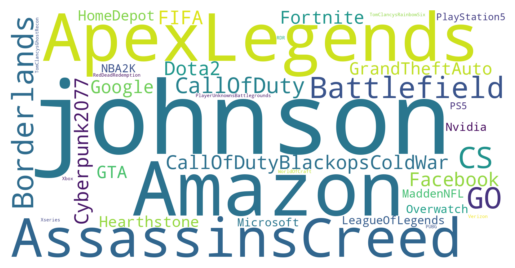

In [65]:
topic_list = ' '.join(crosstab.index)

wc = WordCloud(background_color="white", max_words=2000, width=1600, height=800)
wc.generate(topic_list)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

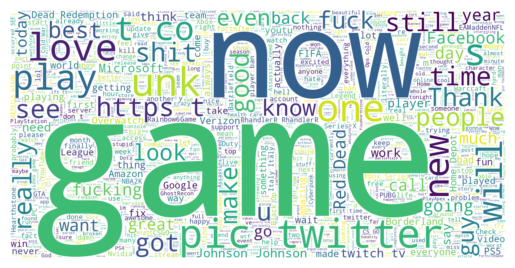

In [66]:
corpus = ' '.join(train['Text'])

wc = WordCloud(background_color="white", max_words=2000, width=1600, height=800)
wc.generate(corpus)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

train['Text']:

This part accesses the 'Text' column of the train DataFrame, which contains individual text entries (messages or comments).
' '.join(...):

The join() method is a string method in Python that concatenates the elements of an iterable (in this case, the list of texts) into a single string, using the specified separator—in this case, a space ' '.
This means that all text entries from the 'Text' column will be combined into one long string, with a space separating each entry.
corpus = ...:

This assigns the resulting single string (the corpus) to the variable corpus.